In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg
import random

In [2]:
pi = np.pi

In [3]:
deltat = 0.05
Omega = 2*pi
p=0.01

In [4]:
t = np.linspace(0, 10, num=200)

In [5]:
H = (Omega/2)*np.array([ [1,0] , [0,-1] ])
sigmax = np.array( [ [0,1] , [1,0]])

In [6]:
H

array([[ 3.14159265,  0.        ],
       [ 0.        , -3.14159265]])

In [7]:
U = linalg.expm((-1j)*deltat*H)

In [8]:
U

array([[0.98768834-0.15643447j, 0.        +0.j        ],
       [0.        +0.j        , 0.98768834+0.15643447j]])

In [9]:
phi = np.array([1/math.sqrt(2),1/math.sqrt(2)])

In [10]:
Esigmax = np.array(np.vdot(phi,sigmax.dot(phi)))

In [11]:
for i in t:
    phi = U.dot(phi)
    Esigmax = np.append(Esigmax, np.vdot(phi,sigmax.dot(phi)))
    

In [12]:
t=np.append(t,10.005)

C:\Users\soumy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


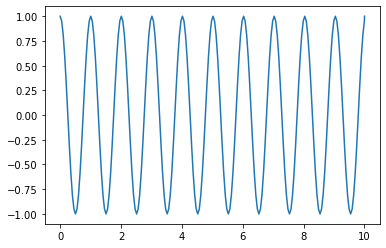

In [13]:
plt.plot(t, Esigmax)

In [14]:
t=np.delete(t,-1)

In [15]:
phi2 = []

In [16]:
Esigmax2=[]

In [17]:
for i in range(100):
    phi2.append(phi)

In [18]:
phi2 = np.asarray(phi2)

In [19]:
for i in t:
    dummy=0
    for j in range(100):
        if random.random() < p:
            phi2[j] = np.array([1,0])
        else:
            
            phi2[j] = U.dot(phi2[j])
            
        dummy = dummy + np.vdot(phi2[j],sigmax.dot(phi2[j]))
    Esigmax2.append(dummy)

In [20]:
Esigmax2 = np.asarray(Esigmax2)

C:\Users\soumy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


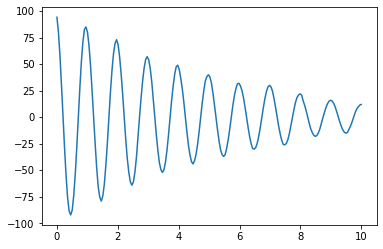

In [21]:
plt.plot(t, Esigmax2)